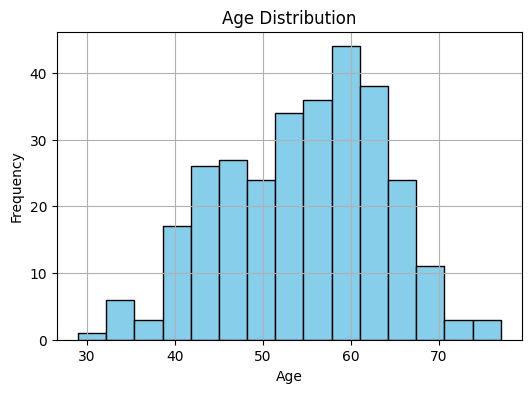

<Figure size 600x400 with 0 Axes>

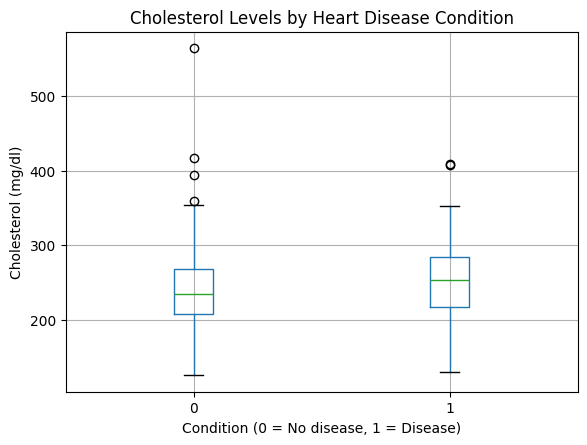

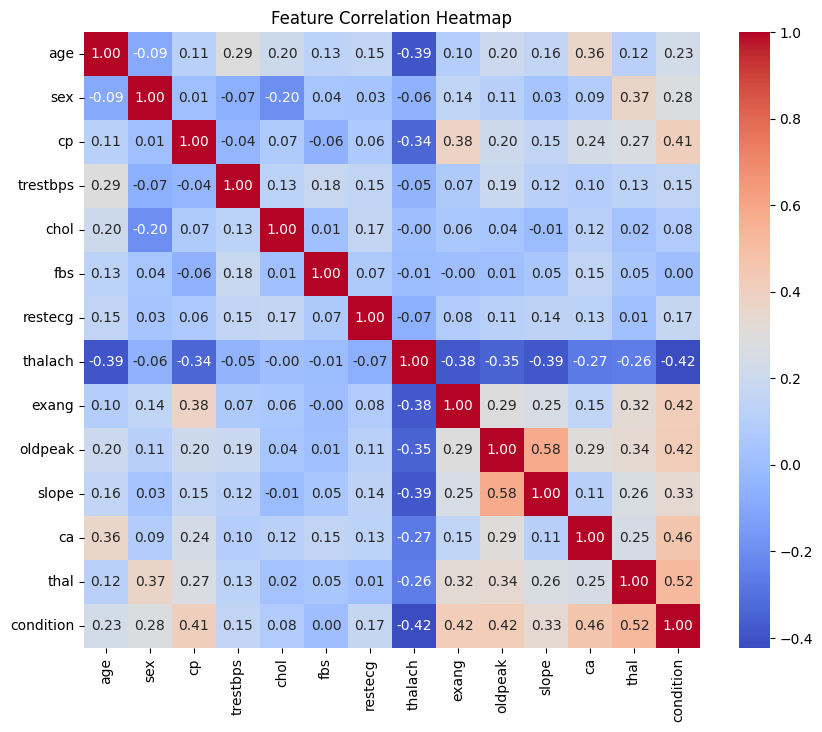

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("heart_cleveland_upload.csv")

# === Age Distribution ===
plt.figure(figsize=(6, 4))
plt.hist(df["age"], bins=15, color='skyblue', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# === Cholesterol by Condition ===
plt.figure(figsize=(6, 4))
df.boxplot(column="chol", by="condition")
plt.title("Cholesterol Levels by Heart Disease Condition")
plt.suptitle("")
plt.xlabel("Condition (0 = No disease, 1 = Disease)")
plt.ylabel("Cholesterol (mg/dl)")
plt.grid(True)
plt.show()

# === Correlation Heatmap ===
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [31]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [32]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,66,0,3,178,228,1,0,165,1,1.0,1,2,2,1
1,59,1,3,140,177,0,0,162,1,0.0,0,1,2,1
2,41,1,1,135,203,0,0,132,0,0.0,1,0,1,0
3,37,0,2,120,215,0,0,170,0,0.0,0,0,0,0
4,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0


In [33]:
df.rename(columns={"chol": "cholestrol"}, inplace=True)
df.rename(columns={"thal": "Thalassemia"}, inplace=True)
df.rename(columns={"thal": "Thalassemia"}, inplace=True)
df.rename(columns={"exang": "exercise-induced angina"}, inplace=True)
df.rename(columns={"fbs": "fasting blood sugar"}, inplace=True)
df.rename(columns={"trestbps": "resting blood pressure"}, inplace=True)
df

,age,sex,cp,resting blood pressure,cholestrol,fasting blood sugar,restecg,thalach,exercise-induced angina,oldpeak,slope,ca,Thalassemia,condition
0,66,0,3,178,228,1,0,165,1,1.0,1,2,2,1
1,59,1,3,140,177,0,0,162,1,0.0,0,1,2,1
2,41,1,1,135,203,0,0,132,0,0.0,1,0,1,0
3,37,0,2,120,215,0,0,170,0,0.0,0,0,0,0
4,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,62,0,3,140,394,0,2,157,0,1.2,1,0,0,0
293,29,1,1,130,204,0,2,202,0,0.0,0,0,0,0
294,56,1,2,130,256,1,2,142,1,0.6,1,1,1,1
295,47,1,3,110,275,0,2,118,1,1.0,1,1,0,1


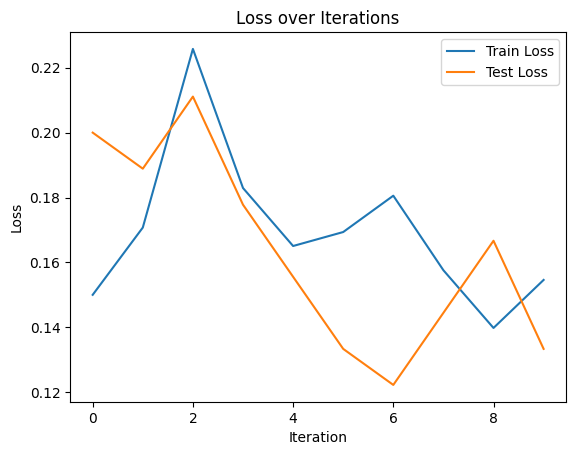

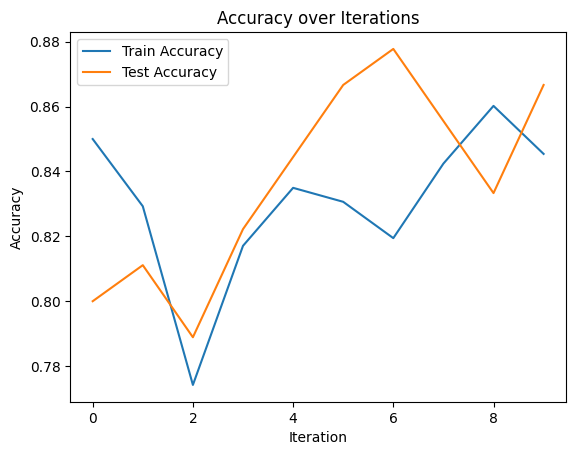


=== Final Evaluation on Test Set ===
Accuracy : 0.8667
Precision: 0.8611
Recall   : 0.8158
F1 Score : 0.8378


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("heart_cleveland_upload.csv")
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Manual 70/30 split
split = int(0.7 * len(df))
train_df = df[:split]
test_df = df[split:]

features = [col for col in df.columns if col != "condition"]

def calculate_prior(df, label_col):
    priors = {}
    classes = sorted(df[label_col].unique())
    for c in classes:
        priors[c] = len(df[df[label_col] == c]) / len(df)
    return priors

def calculate_likelihood(df, feature, value, label_col, label):
    sub = df[df[label_col] == label]
    mean = sub[feature].mean()
    std = sub[feature].std()
    std = std if std > 0 else 1e-6
    return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-((value - mean)**2) / (2 * std**2))

def predict_naive_bayes(train_df, X, label_col):
    priors = calculate_prior(train_df, label_col)
    classes = sorted(train_df[label_col].unique())
    preds = []
    probs = []

    for x in X:
        posteriors = {}
        for c in classes:
            likelihood = 1
            for i, feature in enumerate(features):
                likelihood *= calculate_likelihood(train_df, feature, x[i], label_col, c)
            posteriors[c] = priors[c] * likelihood
        pred = max(posteriors, key=posteriors.get)
        preds.append(pred)
        probs.append(posteriors)
    return np.array(preds), probs

def compute_loss(y_true, y_pred):
    return np.mean(y_true != y_pred)

def compute_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def compute_metrics(y_true, y_pred):
    tp = sum((y_true == 1) & (y_pred == 1))
    tn = sum((y_true == 0) & (y_pred == 0))
    fp = sum((y_true == 0) & (y_pred == 1))
    fn = sum((y_true == 1) & (y_pred == 0))

    precision = tp / (tp + fp + 1e-10)
    recall = tp / (tp + fn + 1e-10)
    f1 = 2 * precision * recall / (precision + recall + 1e-10)
    acc = (tp + tn) / len(y_true)
    return acc, precision, recall, f1

train_X = train_df[features].values
train_y = train_df["condition"].values
test_X = test_df[features].values
test_y = test_df["condition"].values

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for i in range(1, 11):  # Simulate "iterations" by increasing training subset size
    size = int(len(train_X) * i / 10)
    temp_train_df = train_df[:size]
    
    train_preds, _ = predict_naive_bayes(temp_train_df, temp_train_df[features].values, "condition")
    test_preds, _ = predict_naive_bayes(temp_train_df, test_X, "condition")

    train_loss = compute_loss(temp_train_df["condition"].values, train_preds)
    test_loss = compute_loss(test_y, test_preds)

    train_acc = compute_accuracy(temp_train_df["condition"].values, train_preds)
    test_acc = compute_accuracy(test_y, test_preds)

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.title("Loss over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(test_accuracies, label="Test Accuracy")
plt.title("Accuracy over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

final_preds, _ = predict_naive_bayes(train_df, test_X, "condition")
accuracy, precision, recall, f1 = compute_metrics(test_y, final_preds)

print("\n=== Final Evaluation on Test Set ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
